# Pokemon - Stat Distribution Analysis

## Step 1: Understand the Dataset

Load the dataset

In [59]:
import pandas as pd
import numpy as np

# define dataset path
# dataset downloaded manually from https://pokemondb.net/pokedex/all

path = r"pokedex.json"
pokedex = pd.read_json(path)

Check the first few row

In [60]:
pokedex.head()

,#,name,type,total,hp,attack,defense,sp. atk,sp. def,speed
0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,\t,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,\t,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0001,Bulbasaur,Grass Poison,318.0,45.0,49.0,49.0,65.0,65.0,45.0
4,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Check for missing or inconsistent data using

In [61]:
pokedex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9721 entries, 0 to 9720
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   #        9721 non-null   object 
 1   name     2430 non-null   object 
 2   type     2430 non-null   object 
 3   total    2430 non-null   float64
 4   hp       2430 non-null   float64
 5   attack   2430 non-null   float64
 6   defense  2430 non-null   float64
 7   sp. atk  2430 non-null   float64
 8   sp. def  2430 non-null   float64
 9   speed    2430 non-null   float64
dtypes: float64(7), object(3)
memory usage: 759.6+ KB


In [62]:
pokedex.isnull().sum()

#             0
name       7291
type       7291
total      7291
hp         7291
attack     7291
defense    7291
sp. atk    7291
sp. def    7291
speed      7291
dtype: int64

There are 7291 missing data, let's clean in the next step

## Step 2: Clean the Data

Let's check some sample data to make sure that the null data is not important

In [63]:
pokedex.sample(10)

,#,name,type,total,hp,attack,defense,sp. atk,sp. def,speed
6193,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6286,\t,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9289,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4133,\t,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9144,0899,Wyrdeer,Normal Psychic,525.0,103.0,105.0,72.0,105.0,75.0,65.0
2374,\t,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7196,0479,Rotom Heat Rotom,Electric Fire,520.0,50.0,65.0,107.0,105.0,107.0,86.0
6784,0386,Deoxys Speed Forme,Psychic,600.0,50.0,95.0,90.0,95.0,90.0,180.0
3017,\t,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1066,\t,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


look like the null data coming from uncleaned json data, let's drop that

In [64]:
pokedex = pokedex.dropna()

let's check the data again

In [65]:
pokedex.isnull().sum()

#          0
name       0
type       0
total      0
hp         0
attack     0
defense    0
sp. atk    0
sp. def    0
speed      0
dtype: int64

In [66]:
pokedex.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2430 entries, 3 to 9720
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   #        2430 non-null   object 
 1   name     2430 non-null   object 
 2   type     2430 non-null   object 
 3   total    2430 non-null   float64
 4   hp       2430 non-null   float64
 5   attack   2430 non-null   float64
 6   defense  2430 non-null   float64
 7   sp. atk  2430 non-null   float64
 8   sp. def  2430 non-null   float64
 9   speed    2430 non-null   float64
dtypes: float64(7), object(3)
memory usage: 208.8+ KB


The cleaned data is now consistent, let's check if there are any duplicate

In [67]:
pokedex

,#,name,type,total,hp,attack,defense,sp. atk,sp. def,speed
3,0001,Bulbasaur,Grass Poison,318.0,45.0,49.0,49.0,65.0,65.0,45.0
7,0002,Ivysaur,Grass Poison,405.0,60.0,62.0,63.0,80.0,80.0,60.0
11,0003,Venusaur,Grass Poison,525.0,80.0,82.0,83.0,100.0,100.0,80.0
15,0003,Venusaur Mega Venusaur,Grass Poison,625.0,80.0,100.0,123.0,122.0,120.0,80.0
19,0004,Charmander,Fire,309.0,39.0,52.0,43.0,60.0,50.0,65.0
...,...,...,...,...,...,...,...,...,...,...
9704,1023,Iron Crown,Steel Psychic,590.0,90.0,72.0,100.0,122.0,108.0,98.0
9708,1024,Terapagos Normal Form,Normal,450.0,90.0,65.0,85.0,65.0,85.0,60.0
9712,1024,Terapagos Terastal Form,Normal,600.0,95.0,95.0,110.0,105.0,110.0,85.0
9716,1024,Terapagos Stellar Form,Normal,700.0,160.0,105.0,110.0,130.0,110.0,85.0


it looks like some pokemon is a dual type pokemon, let's split the column so we can check their primary type and their secondary type

In [68]:
pokedex[['main_type','secondary_type']] = pokedex['type'].str.split(expand=True)
pokedex

,#,name,type,total,hp,attack,defense,sp. atk,sp. def,speed,main_type,secondary_type
3,0001,Bulbasaur,Grass Poison,318.0,45.0,49.0,49.0,65.0,65.0,45.0,Grass,Poison
7,0002,Ivysaur,Grass Poison,405.0,60.0,62.0,63.0,80.0,80.0,60.0,Grass,Poison
11,0003,Venusaur,Grass Poison,525.0,80.0,82.0,83.0,100.0,100.0,80.0,Grass,Poison
15,0003,Venusaur Mega Venusaur,Grass Poison,625.0,80.0,100.0,123.0,122.0,120.0,80.0,Grass,Poison
19,0004,Charmander,Fire,309.0,39.0,52.0,43.0,60.0,50.0,65.0,Fire,None
...,...,...,...,...,...,...,...,...,...,...,...,...
9704,1023,Iron Crown,Steel Psychic,590.0,90.0,72.0,100.0,122.0,108.0,98.0,Steel,Psychic
9708,1024,Terapagos Normal Form,Normal,450.0,90.0,65.0,85.0,65.0,85.0,60.0,Normal,None
9712,1024,Terapagos Terastal Form,Normal,600.0,95.0,95.0,110.0,105.0,110.0,85.0,Normal,None
9716,1024,Terapagos Stellar Form,Normal,700.0,160.0,105.0,110.0,130.0,110.0,85.0,Normal,None


let's arrange the column

In [69]:
pokedex = pokedex[['#', 'name', 'main_type','secondary_type','hp','attack','defense','sp. atk','sp. def', 'speed']]
pokedex.sample(10)

,#,name,main_type,secondary_type,hp,attack,defense,sp. atk,sp. def,speed
287,0053,Persian Alolan Persian,Dark,None,65.0,60.0,60.0,75.0,65.0,115.0
6216,0269,Dustox,Bug,Poison,60.0,50.0,70.0,50.0,90.0,65.0
379,0073,Tentacruel,Water,Poison,80.0,70.0,65.0,80.0,120.0,100.0
9204,0911,Skeledirge,Fire,Ghost,104.0,75.0,100.0,110.0,75.0,66.0
8468,0745,Lycanroc Dusk Form,Rock,None,75.0,117.0,65.0,55.0,65.0,110.0
6972,0428,Lopunny Mega Lopunny,Normal,Fighting,65.0,136.0,94.0,54.0,96.0,135.0
7112,0460,Abomasnow Mega Abomasnow,Grass,Ice,90.0,132.0,105.0,132.0,105.0,30.0
6984,0431,Glameow,Normal,None,49.0,55.0,42.0,42.0,37.0,85.0
6060,0236,Tyrogue,Fighting,None,35.0,35.0,35.0,35.0,35.0,35.0
3951,0826,Orbeetle,Bug,Psychic,60.0,45.0,110.0,80.0,120.0,90.0


we noticed that some pokemon have several form, but is actually the same pokemon, let split between base name and specific form (if any)

In [70]:
#looks like some value in "name" column is mixed between additional info and the real pokemon name, let's split those two value by creating new function
#since there are some Pokemon in the  Pokemon series that hase non-traditional Pokemon name, let's make the funtion skipped the value if it's included in the list of Paradox pokemon name

SKIPPED_POKEMON = [
    'Great Tusk',
    'Scream Tail',
    'Brute Bonnet',
    'Flutter Mane',
    'Slither Wing',
    'Sandy Shocks',
    'Roaring Moon',
    'Walking Wake',
    'Gouging Fire',
    'Raging Bolt',
    'Iron Treads',
    'Iron Bundle',
    'Iron Hands',
    'Iron Jugulis',
    'Iron Moth',
    'Iron Thorns',
    'Iron Valiant',
    'Iron Leaves',
    'Iron Boulder',
    'Iron Crown',
    'Type: Null',
    'Mr. Mime',
    'Mr. Rime',
    'Mime Jr.',
    'Tapu Koko',
    'Tapu Lele',
    'Tapu Bulu',
    'Tapu Fini'
]

def split_first_delimiter(value):
    # Check if the name is a Paradox Pokémon
    if value in SKIPPED_POKEMON:
        return pd.Series([value, ''])
    
    # Split only on the first space
    parts = value.split(' ', 1)
    
    # If there's only one part, return the original value and an empty string
    if len(parts) == 1:
        return pd.Series([parts[0], ''])
    
    # Otherwise, return the first part and the rest
    return pd.Series(parts)

In [71]:
#let's apply the function
pokedex[['base_name', 'form']] = pokedex['name'].apply(split_first_delimiter)

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_14624\2306356890.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pokedex[['base_name', 'form']] = pokedex['name'].apply(split_first_delimiter)


In [72]:
pokedex

,#,name,main_type,secondary_type,hp,attack,defense,sp. atk,sp. def,speed,base_name,form
3,0001,Bulbasaur,Grass,Poison,45.0,49.0,49.0,65.0,65.0,45.0,Bulbasaur,
7,0002,Ivysaur,Grass,Poison,60.0,62.0,63.0,80.0,80.0,60.0,Ivysaur,
11,0003,Venusaur,Grass,Poison,80.0,82.0,83.0,100.0,100.0,80.0,Venusaur,
15,0003,Venusaur Mega Venusaur,Grass,Poison,80.0,100.0,123.0,122.0,120.0,80.0,Venusaur,Mega Venusaur
19,0004,Charmander,Fire,None,39.0,52.0,43.0,60.0,50.0,65.0,Charmander,
...,...,...,...,...,...,...,...,...,...,...,...,...
9704,1023,Iron Crown,Steel,Psychic,90.0,72.0,100.0,122.0,108.0,98.0,Iron Crown,
9708,1024,Terapagos Normal Form,Normal,None,90.0,65.0,85.0,65.0,85.0,60.0,Terapagos,Normal Form
9712,1024,Terapagos Terastal Form,Normal,None,95.0,95.0,110.0,105.0,110.0,85.0,Terapagos,Terastal Form
9716,1024,Terapagos Stellar Form,Normal,None,160.0,105.0,110.0,130.0,110.0,85.0,Terapagos,Stellar Form


In [73]:
#rename some column
pokedex.rename(columns={'#': 'id', 'sp. atk': 'sp_atk', 'sp. def': 'sp_def'}, inplace=True)

In [74]:
pokedex

,id,name,main_type,secondary_type,hp,attack,defense,sp_atk,sp_def,speed,base_name,form
3,0001,Bulbasaur,Grass,Poison,45.0,49.0,49.0,65.0,65.0,45.0,Bulbasaur,
7,0002,Ivysaur,Grass,Poison,60.0,62.0,63.0,80.0,80.0,60.0,Ivysaur,
11,0003,Venusaur,Grass,Poison,80.0,82.0,83.0,100.0,100.0,80.0,Venusaur,
15,0003,Venusaur Mega Venusaur,Grass,Poison,80.0,100.0,123.0,122.0,120.0,80.0,Venusaur,Mega Venusaur
19,0004,Charmander,Fire,None,39.0,52.0,43.0,60.0,50.0,65.0,Charmander,
...,...,...,...,...,...,...,...,...,...,...,...,...
9704,1023,Iron Crown,Steel,Psychic,90.0,72.0,100.0,122.0,108.0,98.0,Iron Crown,
9708,1024,Terapagos Normal Form,Normal,None,90.0,65.0,85.0,65.0,85.0,60.0,Terapagos,Normal Form
9712,1024,Terapagos Terastal Form,Normal,None,95.0,95.0,110.0,105.0,110.0,85.0,Terapagos,Terastal Form
9716,1024,Terapagos Stellar Form,Normal,None,160.0,105.0,110.0,130.0,110.0,85.0,Terapagos,Stellar Form


In [75]:
pokedex[pokedex['base_name'] == 'Rotom']

,id,name,main_type,secondary_type,hp,attack,defense,sp_atk,sp_def,speed,base_name,form
2331,0479,Rotom,Electric,Ghost,50.0,50.0,77.0,95.0,77.0,91.0,Rotom,
2335,0479,Rotom Heat Rotom,Electric,Fire,50.0,65.0,107.0,105.0,107.0,86.0,Rotom,Heat Rotom
2339,0479,Rotom Wash Rotom,Electric,Water,50.0,65.0,107.0,105.0,107.0,86.0,Rotom,Wash Rotom
2343,0479,Rotom Frost Rotom,Electric,Ice,50.0,65.0,107.0,105.0,107.0,86.0,Rotom,Frost Rotom
2347,0479,Rotom Fan Rotom,Electric,Flying,50.0,65.0,107.0,105.0,107.0,86.0,Rotom,Fan Rotom
2351,0479,Rotom Mow Rotom,Electric,Grass,50.0,65.0,107.0,105.0,107.0,86.0,Rotom,Mow Rotom
7192,0479,Rotom,Electric,Ghost,50.0,50.0,77.0,95.0,77.0,91.0,Rotom,
7196,0479,Rotom Heat Rotom,Electric,Fire,50.0,65.0,107.0,105.0,107.0,86.0,Rotom,Heat Rotom
7200,0479,Rotom Wash Rotom,Electric,Water,50.0,65.0,107.0,105.0,107.0,86.0,Rotom,Wash Rotom
7204,0479,Rotom Frost Rotom,Electric,Ice,50.0,65.0,107.0,105.0,107.0,86.0,Rotom,Frost Rotom


Delete some duplicate

In [76]:
pokedex = pokedex.drop_duplicates()

check data with newest column order

In [77]:
pokedex = pokedex[['id', 'base_name', 'form', 'main_type','secondary_type','hp','attack','defense','sp_atk','sp_def', 'speed']]

In [78]:
pokedex.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1215 entries, 3 to 4859
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              1215 non-null   object 
 1   base_name       1215 non-null   object 
 2   form            1215 non-null   object 
 3   main_type       1215 non-null   object 
 4   secondary_type  669 non-null    object 
 5   hp              1215 non-null   float64
 6   attack          1215 non-null   float64
 7   defense         1215 non-null   float64
 8   sp_atk          1215 non-null   float64
 9   sp_def          1215 non-null   float64
 10  speed           1215 non-null   float64
dtypes: float64(6), object(5)
memory usage: 113.9+ KB


In [79]:
pokedex.sample(10)

,id,base_name,form,main_type,secondary_type,hp,attack,defense,sp_atk,sp_def,speed
1703,0347,Anorith,,Rock,Bug,45.0,95.0,50.0,40.0,50.0,75.0
375,0072,Tentacool,,Water,Poison,40.0,40.0,35.0,50.0,100.0,70.0
2215,0452,Drapion,,Poison,Dark,70.0,90.0,110.0,60.0,75.0,95.0
3895,0812,Rillaboom,,Grass,None,100.0,125.0,90.0,60.0,70.0,85.0
27,0006,Charizard,,Fire,Flying,78.0,84.0,78.0,109.0,85.0,100.0
4487,0942,Maschiff,,Dark,None,60.0,78.0,60.0,40.0,51.0,51.0
779,0145,Zapdos,Galarian Zapdos,Fighting,Flying,90.0,125.0,90.0,85.0,90.0,100.0
99,0019,Rattata,,Normal,None,30.0,56.0,35.0,25.0,35.0,72.0
2671,0550,Basculin,White-Striped Form,Water,None,70.0,92.0,65.0,80.0,55.0,98.0
1315,0261,Poochyena,,Dark,None,35.0,55.0,35.0,30.0,30.0,35.0


After cleaning, we got 1215 total pokemon, including the one with several form

## Step 3: Calculate Summary Statistics

In [80]:
# Overall summary stats
print(pokedex.describe())

                hp       attack      defense       sp_atk       sp_def  \
count  1215.000000  1215.000000  1215.000000  1215.000000  1215.000000   
mean     71.244444    81.152263    75.007407    73.224691    72.441152   
std      26.927819    32.037134    30.740999    32.757152    27.578188   
min       1.000000     5.000000     5.000000    10.000000    20.000000   
25%      52.000000    57.000000    52.000000    50.000000    51.000000   
50%      70.000000    80.000000    70.000000    65.000000    70.000000   
75%      85.000000   100.000000    91.000000    95.000000    90.000000   
max     255.000000   190.000000   250.000000   194.000000   250.000000   

             speed  
count  1215.000000  
mean     70.034568  
std      30.161298  
min       5.000000  
25%      45.000000  
50%      68.000000  
75%      91.000000  
max     200.000000  


In [81]:
# Grouped stats by main type
type_stats = pokedex.groupby('main_type').mean()
print(type_stats[['attack', 'defense', 'hp', 'speed']])

               attack     defense         hp      speed
main_type                                              
Bug         70.912088   71.208791  56.802198  61.857143
Dark        85.482143   70.982143  72.892857  77.535714
Dragon     103.816327   80.816327  84.571429  84.653061
Electric    73.148649   65.837838  63.837838  87.500000
Fairy       71.064516   73.645161  72.129032  67.064516
Fighting   104.960000   76.440000  75.740000  76.120000
Fire        84.473684   69.315789  70.763158  73.960526
Flying      81.900000   67.400000  70.900000  86.800000
Ghost       72.000000   78.042553  63.595745  63.297872
Grass       77.743363   72.318584  67.318584  62.433628
Ground      94.085106   86.808511  73.893617  63.808511
Ice         80.046512   75.279070  75.186047  67.604651
Normal      76.820896   62.059701  78.910448  70.805970
Poison      77.000000   77.020408  75.795918  67.265306
Psychic     75.646341   71.524390  73.841463  80.365854
Rock        90.676471   97.352941  68.117647  58

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_14624\3581249760.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  type_stats = pokedex.groupby('main_type').mean()


## Step 4: Visualize Stat Distributions

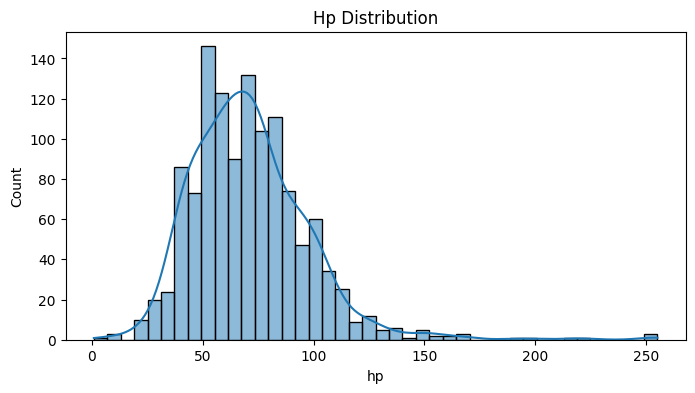

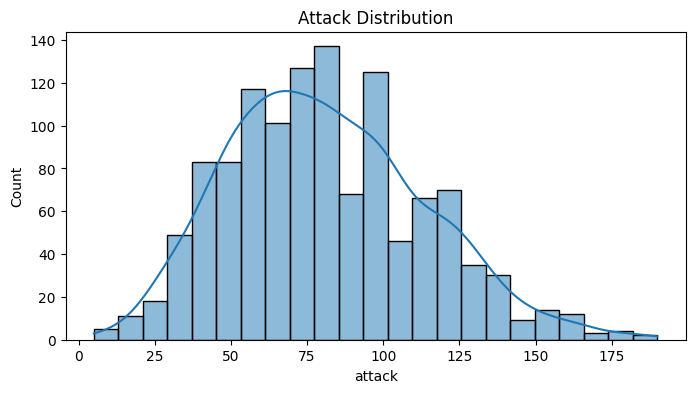

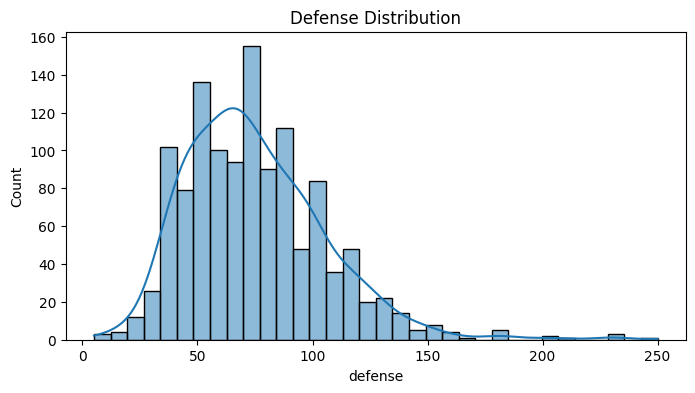

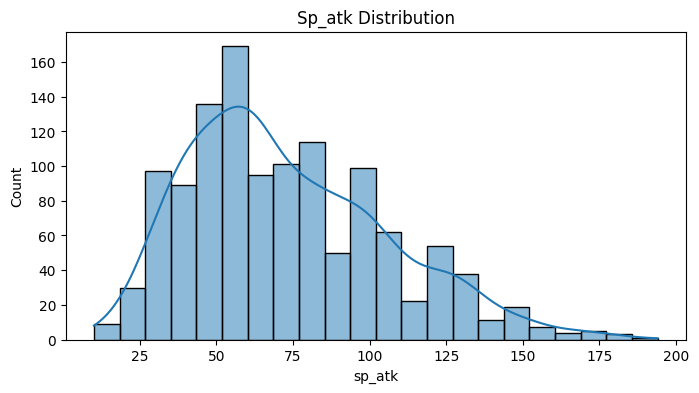

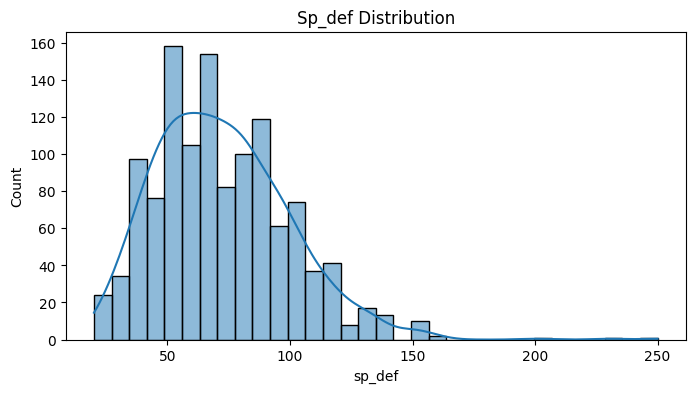

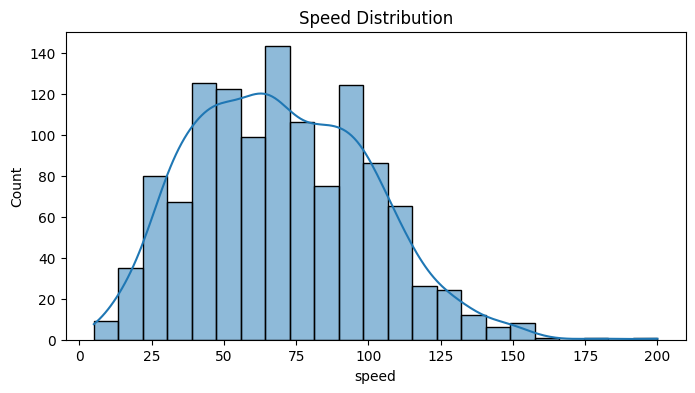

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for each stat
stats = ['hp', 'attack', 'defense', 'sp_atk', 'sp_def', 'speed']
for stat in stats:
    plt.figure(figsize=(8, 4))
    sns.histplot(pokedex[stat], kde=True)
    plt.title(f'{stat.capitalize()} Distribution')
    plt.show()

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_14624\319859351.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=stat, y='base_name', data=top_10, palette='viridis')


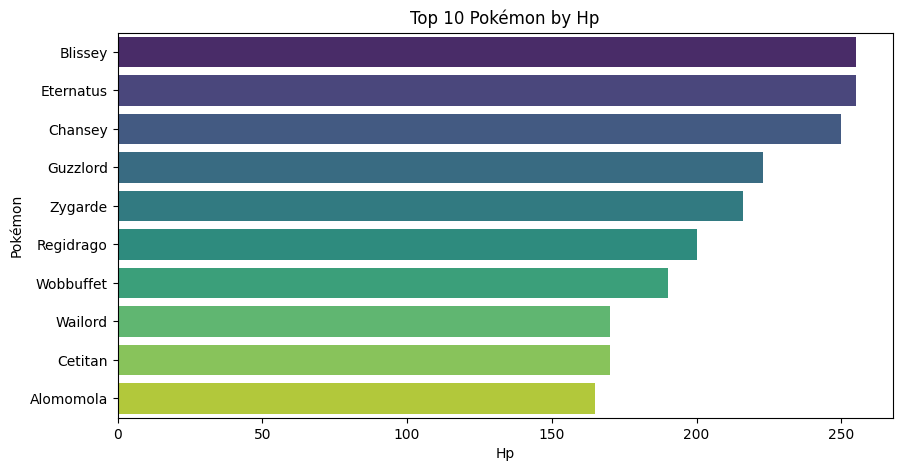

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_14624\319859351.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=stat, y='base_name', data=top_10, palette='viridis')


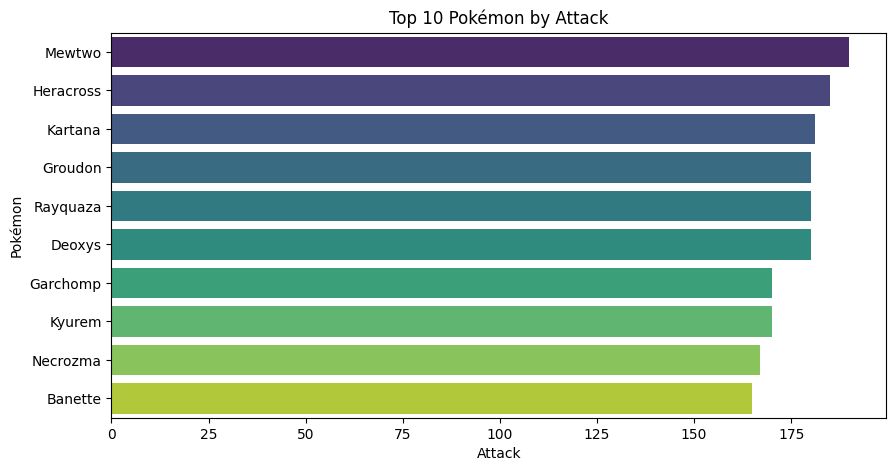

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_14624\319859351.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=stat, y='base_name', data=top_10, palette='viridis')


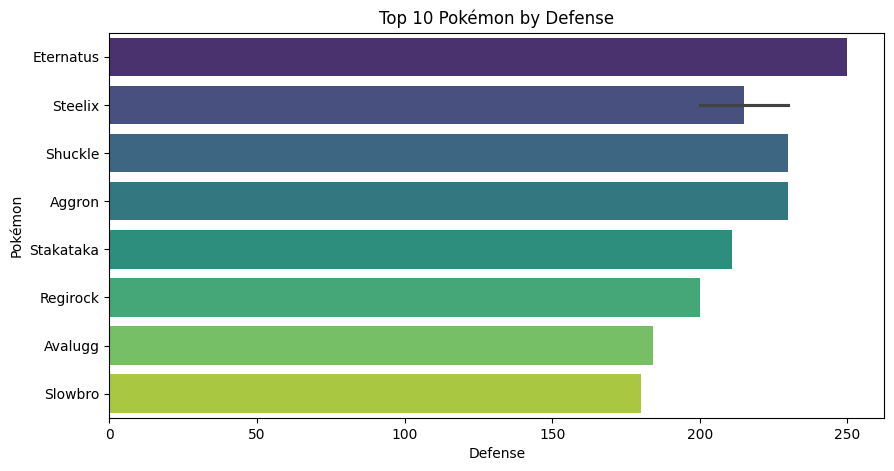

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_14624\319859351.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=stat, y='base_name', data=top_10, palette='viridis')


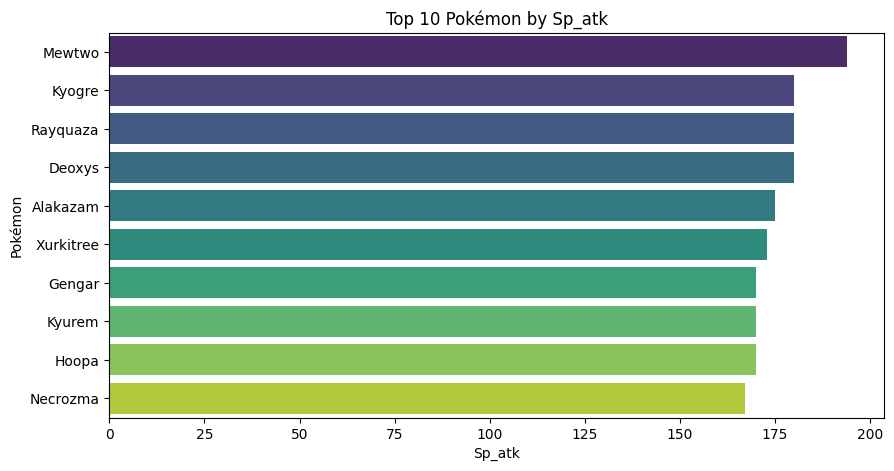

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_14624\319859351.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=stat, y='base_name', data=top_10, palette='viridis')


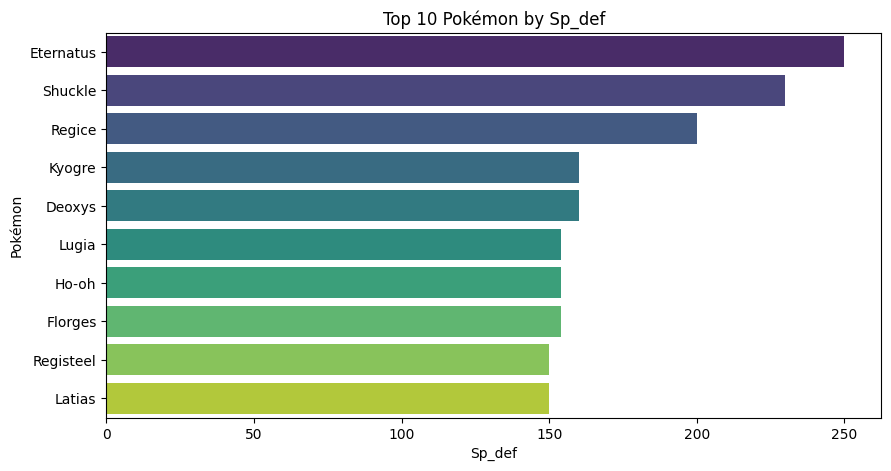

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_14624\319859351.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=stat, y='base_name', data=top_10, palette='viridis')


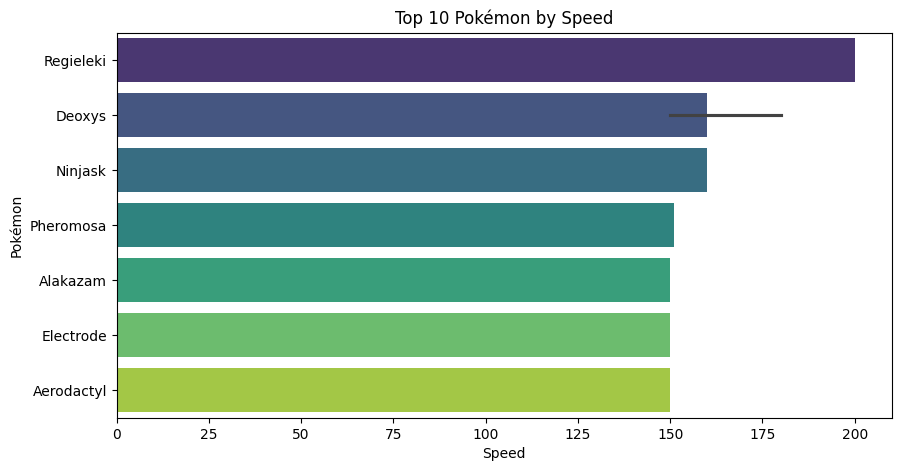

In [83]:
# Stats to visualize
stats = ['hp', 'attack', 'defense', 'sp_atk', 'sp_def', 'speed']

# Plot top 10 Pokémon for each stat
for stat in stats:
    # Get the top 10 Pokémon for this stat
    top_10 = pokedex.nlargest(10, stat)[['base_name', stat]]

    # Plotting
    plt.figure(figsize=(10, 5))
    sns.barplot(x=stat, y='base_name', data=top_10, palette='viridis')
    plt.title(f'Top 10 Pokémon by {stat.capitalize()}')
    plt.xlabel(stat.capitalize())
    plt.ylabel('Pokémon')
    plt.show()


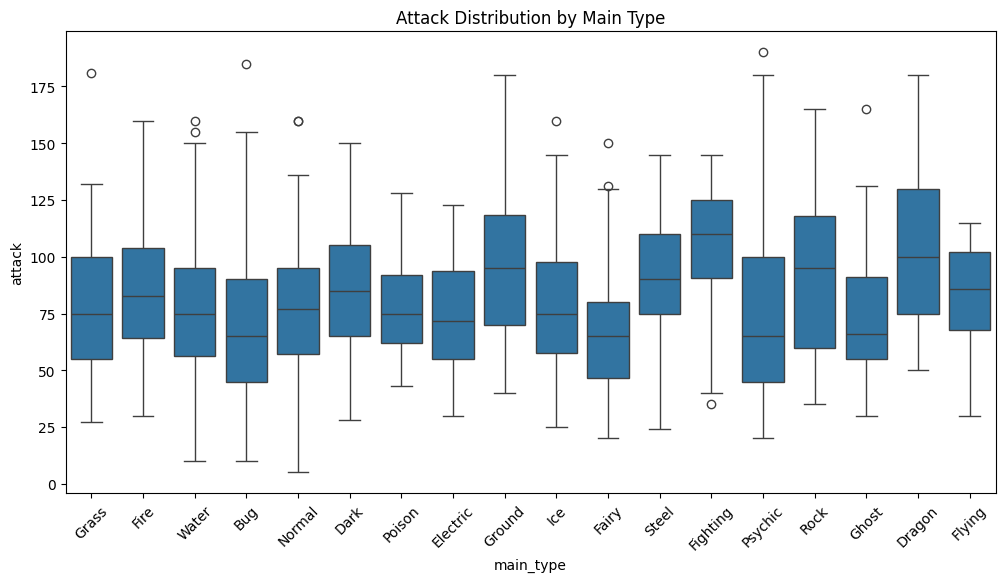

In [84]:
# Boxplot by type for Attack
plt.figure(figsize=(12, 6))
sns.boxplot(x='main_type', y='attack', data=pokedex)
plt.xticks(rotation=45)
plt.title('Attack Distribution by Main Type')
plt.show()

## Step 5: Analyze and Highlight Insights

In [85]:
# Types with highest average attack
top_attack_types = type_stats['attack'].sort_values(ascending=False)
print("Top Attack Types:\n", top_attack_types)

Top Attack Types:
 main_type
Fighting    104.960000
Dragon      103.816327
Ground       94.085106
Steel        92.511111
Rock         90.676471
Dark         85.482143
Fire         84.473684
Flying       81.900000
Ice          80.046512
Grass        77.743363
Poison       77.000000
Water        76.920000
Normal       76.820896
Psychic      75.646341
Electric     73.148649
Ghost        72.000000
Fairy        71.064516
Bug          70.912088
Name: attack, dtype: float64


In [86]:
# average Pokémon attack 
attack_avg = pokedex['attack'].mean()
attack_avg

81.1522633744856

In [87]:
# Pokémon with above-average attack
strong_pokemon = pokedex[pokedex['attack'] > attack_avg]
print(strong_pokemon[['base_name', 'attack']])

         base_name  attack
11        Venusaur    82.0
15        Venusaur   100.0
27       Charizard    84.0
31       Charizard   130.0
35       Charizard   104.0
...            ...     ...
4831  Gouging Fire   115.0
4839  Iron Boulder   120.0
4851     Terapagos    95.0
4855     Terapagos   105.0
4859     Pecharunt    88.0

[554 rows x 2 columns]


In [88]:
# Pokémon with below-average speed
weak_pokemon = pokedex[pokedex['speed'] < attack_avg]
print(weak_pokemon[['base_name', 'speed']])

        base_name  speed
3       Bulbasaur   45.0
7         Ivysaur   60.0
11       Venusaur   80.0
15       Venusaur   80.0
19     Charmander   65.0
...           ...    ...
4791    Sinistcha   70.0
4795      Okidogi   80.0
4827    Hydrapple   44.0
4835  Raging Bolt   75.0
4847    Terapagos   60.0

[786 rows x 2 columns]


In [89]:
# average Pokémon speed 
speed_avg = pokedex['speed'].mean()
speed_avg

70.03456790123457

In [90]:
# Pokémon with above-average speed
fast_pokemon = pokedex[pokedex['speed'] > speed_avg]
print(fast_pokemon[['base_name', 'speed']])

         base_name  speed
11        Venusaur   80.0
15        Venusaur   80.0
23      Charmeleon   80.0
27       Charizard  100.0
31       Charizard  100.0
...            ...    ...
4839  Iron Boulder  124.0
4843    Iron Crown   98.0
4851     Terapagos   85.0
4855     Terapagos   85.0
4859     Pecharunt   88.0

[550 rows x 2 columns]


In [91]:
# Pokémon with below-average speed
slow_pokemon = pokedex[pokedex['speed'] < speed_avg]
print(slow_pokemon[['base_name', 'speed']])

         base_name  speed
3        Bulbasaur   45.0
7          Ivysaur   60.0
19      Charmander   65.0
39        Squirtle   43.0
43       Wartortle   58.0
...            ...    ...
4783       Dipplin   40.0
4787  Poltchageist   50.0
4791     Sinistcha   70.0
4827     Hydrapple   44.0
4847     Terapagos   60.0

[665 rows x 2 columns]


Correlation between stats

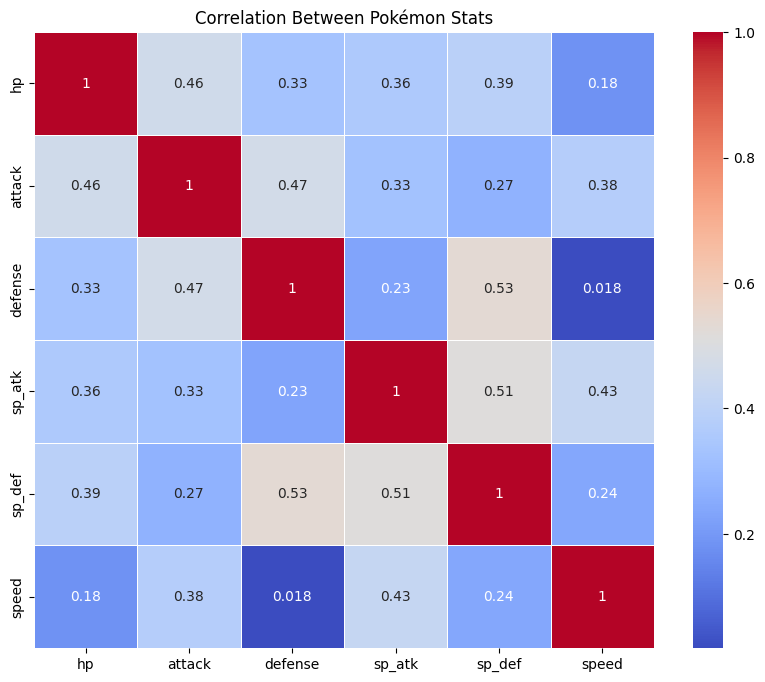

In [92]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pokedex[['hp', 'attack', 'defense', 'sp_atk', 'sp_def', 'speed']].corr(), 
            annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between Pokémon Stats')
plt.show()

Multivariate Analysis: Offensive vs Defensive Types

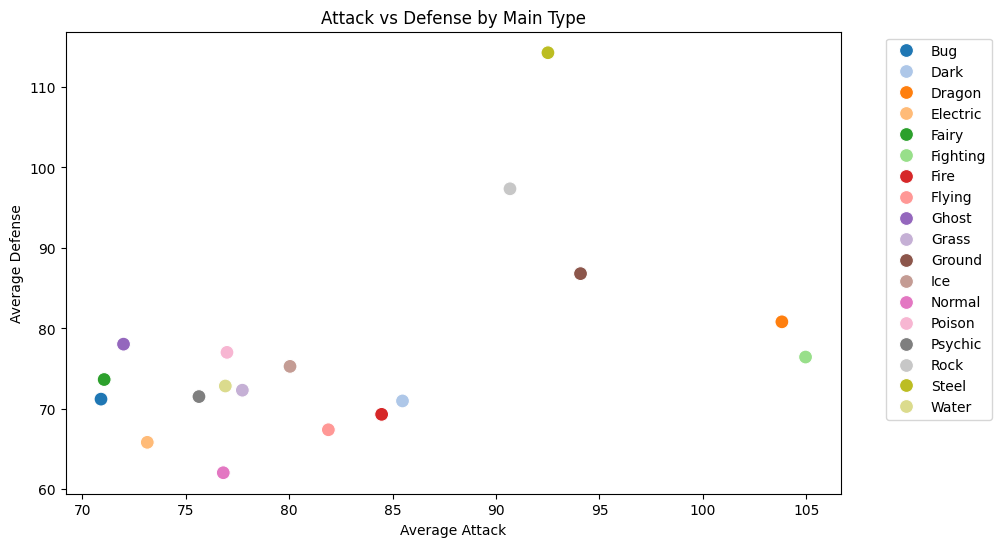

In [93]:
# Aggregate average attack and defense by type
type_off_def = pokedex.groupby('main_type')[['attack', 'defense']].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=type_off_def, x='attack', y='defense', hue='main_type', s=100, palette='tab20')
plt.title('Attack vs Defense by Main Type')
plt.xlabel('Average Attack')
plt.ylabel('Average Defense')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Identify Legendary or Exceptional Pokémon

In [94]:
# Define exceptional Pokémon
exceptional_pokemon = pokedex[(pokedex['attack'] > 120) & (pokedex['speed'] > 100)]
print("Exceptional Pokémon with High Attack and Speed:\n", exceptional_pokemon[['base_name', 'main_type', 'secondary_type', 'attack', 'speed']])

Exceptional Pokémon with High Attack and Speed:
          base_name main_type secondary_type  attack  speed
79        Beedrill       Bug         Poison   150.0  145.0
675         Pinsir       Bug         Flying   155.0  105.0
759     Aerodactyl      Rock         Flying   135.0  150.0
807         Mewtwo   Psychic       Fighting   190.0  130.0
811         Mewtwo   Psychic           None   150.0  140.0
1583      Sharpedo     Water           Dark   140.0  105.0
1771         Absol      Dark           None   150.0  115.0
1835     Salamence    Dragon         Flying   145.0  120.0
1851     Metagross     Steel        Psychic   145.0  110.0
1879        Latios    Dragon        Psychic   130.0  110.0
1903      Rayquaza    Dragon         Flying   180.0  115.0
1911        Deoxys   Psychic           None   150.0  150.0
1915        Deoxys   Psychic           None   180.0  150.0
2111       Lopunny    Normal       Fighting   136.0  135.0
2179      Garchomp    Dragon         Ground   130.0  102.0
2199   

In [95]:
print(f"Total : {exceptional_pokemon.count()}")

Total : id                38
base_name         38
form              38
main_type         38
secondary_type    31
hp                38
attack            38
defense           38
sp_atk            38
sp_def            38
speed             38
dtype: int64


##  Step 6 : Clustering Pokémon Based on Stats

In [111]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming 'pokedex' is your cleaned DataFrame
features = ['attack', 'speed']
X = pokedex[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

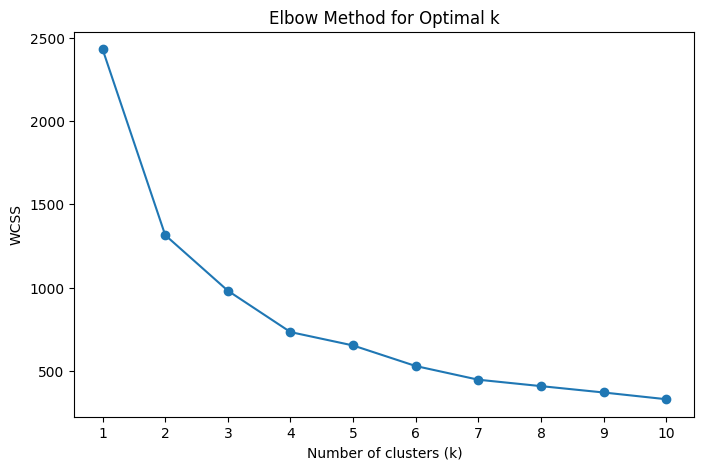

In [110]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
max_clusters = 10  # try different cluster numbers
for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, max_clusters + 1), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.xticks(range(1, max_clusters + 1))
plt.show()

In [116]:
# Set the number of clusters, e.g., k=3 (you can adjust this based on the elbow plot)
optimal_k = 1
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add the cluster labels back to your DataFrame for further analysis
pokedex['cluster'] = clusters
print(pokedex[['base_name', 'cluster']].head())

     base_name  cluster
3    Bulbasaur        0
7      Ivysaur        0
11    Venusaur        0
15    Venusaur        0
19  Charmander        0


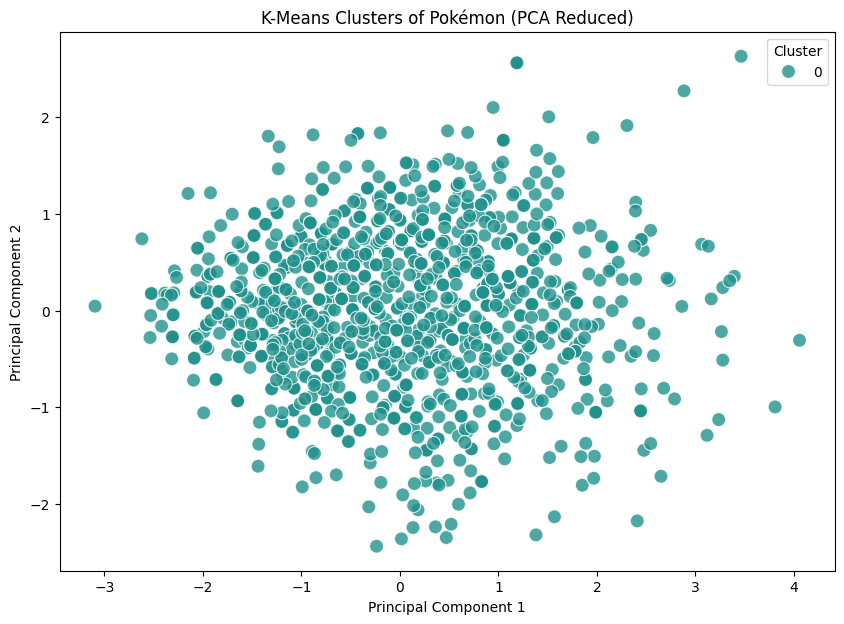

In [117]:
from sklearn.decomposition import PCA
import seaborn as sns

# Reduce dimensions for visualization (2D)
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

# Create a DataFrame with the PCA components and cluster labels
pca_df = pd.DataFrame(data=components, columns=['PC1', 'PC2'])
pca_df['cluster'] = clusters
pca_df['base_name'] = pokedex['base_name']

# Plot the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=pca_df, palette='viridis', s=100, alpha=0.8)
plt.title('K-Means Clusters of Pokémon (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [108]:
# Calculate average stats for each cluster
cluster_summary = pokedex.groupby('cluster')[features].mean()
print(cluster_summary)

                 hp      attack     defense      sp_atk      sp_def      speed
cluster                                                                       
0         49.774112   54.512690   50.568528   47.390863   48.000000  50.081218
1         95.681481  119.429630  101.118519  119.118519  105.014815  96.355556
2        112.371212   95.583333   81.000000   76.924242   76.833333  53.954545
3         70.878049   66.414634   74.004878  101.165854   90.687805  82.751220
4         72.579186  104.638009   70.918552   70.438914   68.352941  99.375566
5         67.429688   90.953125  125.179688   60.585938   86.625000  49.250000
